# Tutorials

Here we will learn some BVlain routines on the example of NaVPO$_4$F compound (see fig. 1 below)

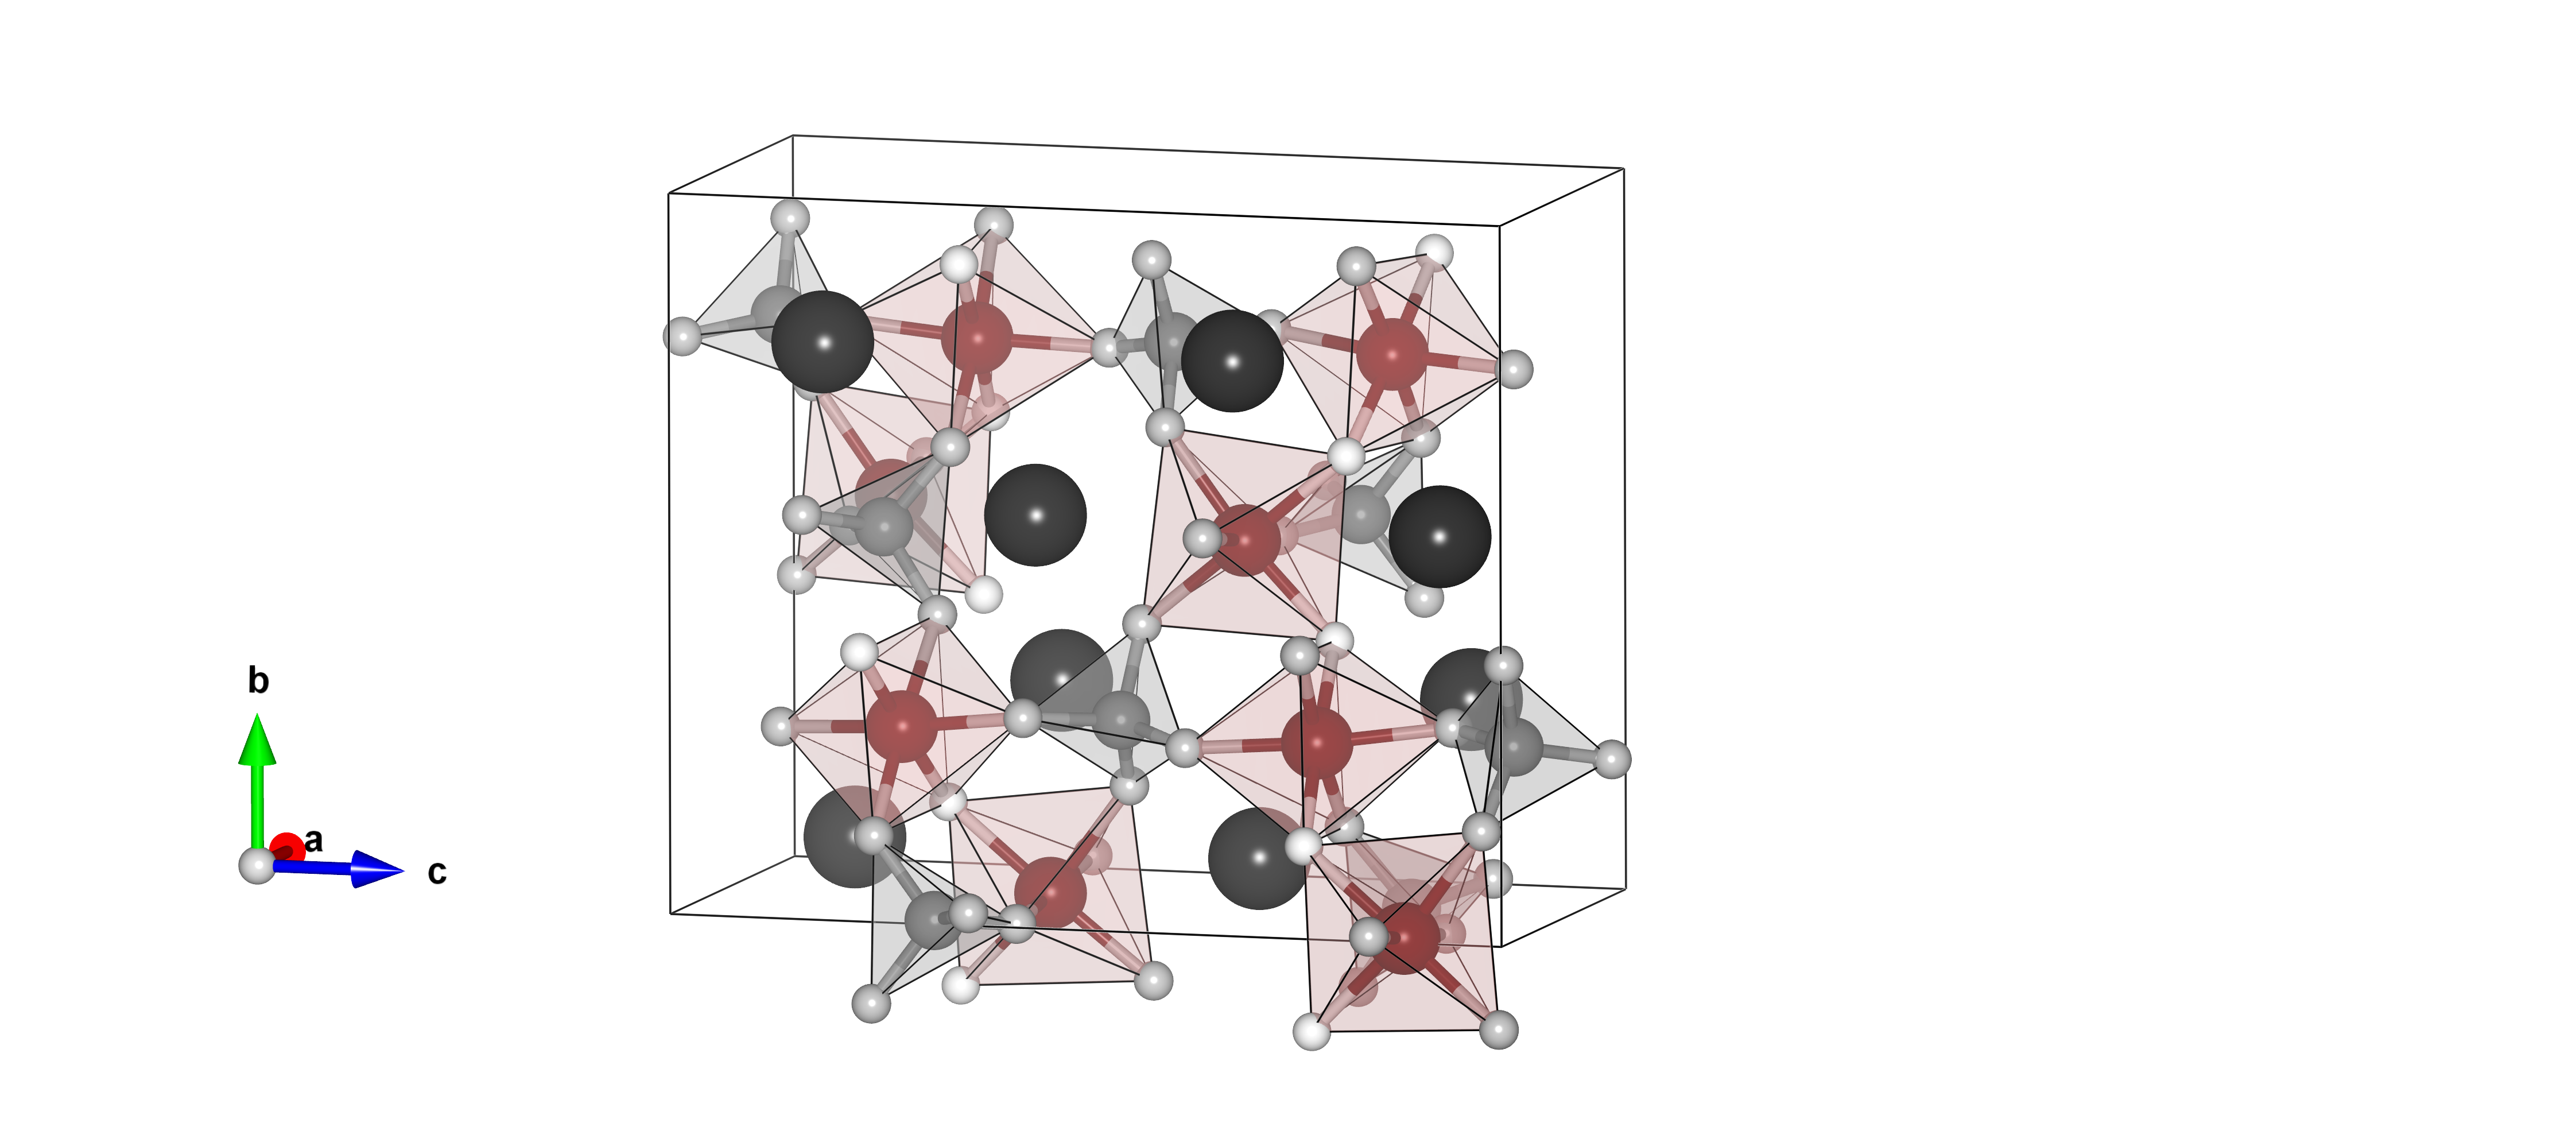
<center>Figure 1. Crystal structure of NaVPO$_4$F. Black spheres are Na$^{+}$ ions</center> 

In [29]:
import os

os.chdir('/Users/artemdembitskiy/Desktop/lain_revised/src')

### Read structure from file

Here we define `lain` object and read structure from .cif file (you can use POSCAR also).
* The code will return pymatgen's Structure with assigned oxidation states.
* Note that calculation cannot be done if no oxidation states are assigned

In [39]:
from test_ import lain

file = '/Users/artemdembitskiy/Downloads/NaVPO4F.cif'

calc = lain(verbose = True)
print(calc.read_file(file, oxi_check = True))

Full Formula (Na8 V8 P8 O32 F8)
Reduced Formula: NaVPO4F
abc   :   6.376216  10.797498  12.885335
angles:  90.000000  90.000000  90.000000
Sites (64)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Na+   0.773457  0.278382  0.355714
  1  Na+   0.226543  0.778382  0.644286
  2  Na+   0.726543  0.278382  0.855714
  3  Na+   0.273457  0.778382  0.144286
  4  Na+   0.794163  0.047857  0.103397
  5  Na+   0.205837  0.547857  0.896603
  6  Na+   0.705837  0.047857  0.603397
  7  Na+   0.294163  0.547857  0.396603
  8  V3+   0.499197  0.006358  0.382759
  9  V3+   0.500803  0.506358  0.617241
 10  V3+   0.000803  0.006358  0.882759
 11  V3+   0.999197  0.506358  0.117241
 12  V3+   0.250576  0.250903  0.241495
 13  V3+   0.749424  0.750903  0.758505
 14  V3+   0.249424  0.250903  0.741495
 15  V3+   0.750576  0.750903  0.258505
 16  P5+   0.339349  0.26416   0.491687
 17  P5+   0.660651  0.76416   0.508313
 18  P5+   0.160651  0.26416   0.991687
 19  P5+  

### Percolation analysis

Now we are ready for analysis of Na$^+$ percolation. There are several parameters to be defined for calculations.


In [41]:
params = {'r_cut': 10.0,
          'resolution': 0.2,
          'k': 100,
          'encut': 5.0,
          'mobile_ion': 'Na1+',
         }
out = calc.percolation_energy_and_dim(**params)
print('Percolation energies:', out)

getting BVSE distribution...
	collecting force field parameters... Na | charge: 1.0
	collecting neighbors...
	neighbors found
distribution is ready

Percolation energies: {'E_1D': 0.166, 'E_2D': 0.4395, 'E_3D': 0.4492}


## Write .grd file

As you could see the energy threshold for 1D pecrolation is quit low (0.166 eV). Let's save .grd file for visualization of peroclation trajectory in VESTA 3.0 (see fig. 2).

In [46]:
calc.grd()

File was written to /Users/artemdembitskiy/Downloads/lain_NaVPO4F.grd



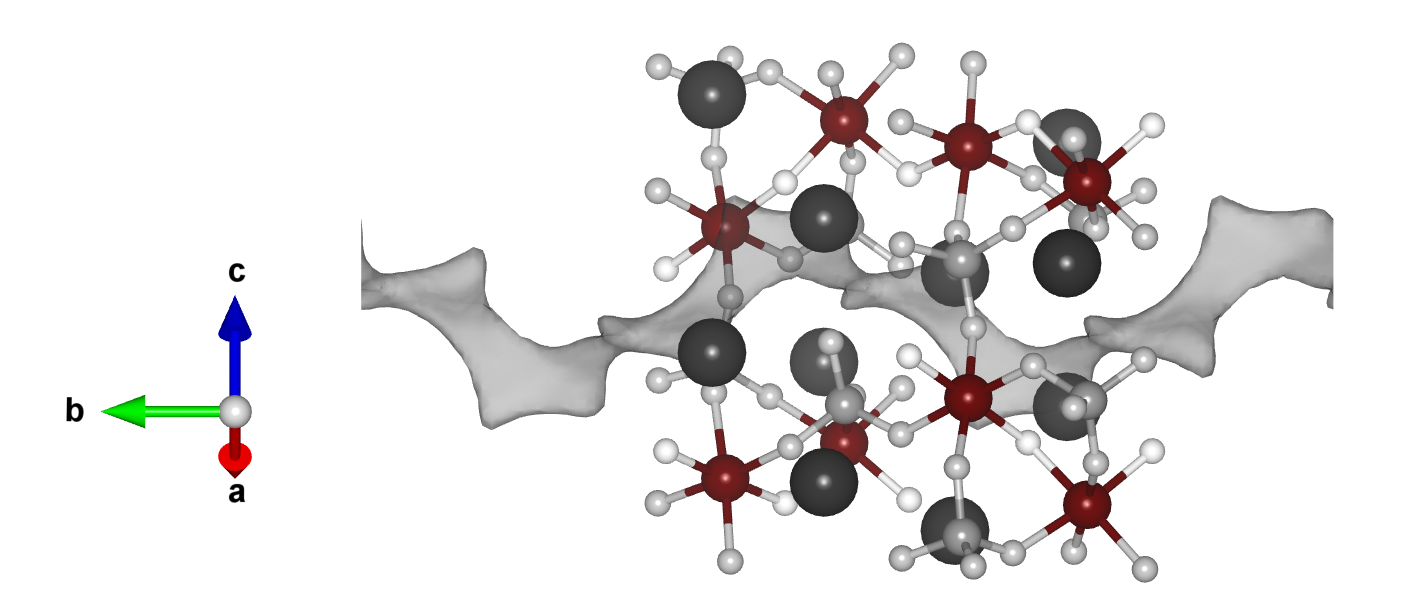
<center>Figure 2. Na$^+$ 1D percolation trajectory in VPO$_4$F frameowrk. Black spheres are Na$^{+}$ ions</center> 

### BVS mismatch
Also we can check if assigned oxidation states are in agreement with crystal structure. It can be done with `mismatch` method calculating Bond Valence sum mismatch.

In [71]:
calc.mismatch(r_cut = 4)

,atom,x/a,y/b,z/c,formal_charge,mismatch
0,Na,0.7735,0.2784,0.3557,1,0.272915
1,Na,0.2265,0.7784,0.6443,1,0.272915
2,Na,0.7265,0.2784,0.8557,1,0.272915
3,Na,0.2735,0.7784,0.1443,1,0.272915
4,Na,0.7942,0.0479,0.1034,1,0.206782
...,...,...,...,...,...,...
59,F,0.0094,0.3728,0.2270,-1,0.001753
60,F,0.4915,0.1279,0.2614,-1,0.054759
61,F,0.5085,0.6279,0.7386,-1,0.054759
62,F,0.0085,0.1279,0.7614,-1,0.054759


### The full code is below

In [72]:
from time import time
start = time()


calc = lain(verbose = True)
file = '/Users/artemdembitskiy/Downloads/NaVPO4F.cif'

calc.read_file(file)

params = {'r_cut': 10.0,
          'resolution': 0.2,
          'k': 100,
          'encut': 5.0,
          'mobile_ion': 'Na1+',
         }

out = calc.percolation_energy_and_dim(**params)
calc.grd()
print('Percolation energies:', out)
print('Ellapsed time:', round(time() - start, 2), 's')

getting BVSE distribution...
	collecting force field parameters... Na | charge: 1.0
	collecting neighbors...
	neighbors found
distribution is ready

File was written to /Users/artemdembitskiy/Downloads/lain_NaVPO4F.grd

Percolation energies: {'E_1D': 0.166, 'E_2D': 0.4395, 'E_3D': 0.4492}
Ellapsed time: 10.94 s


### Energy ptofile

If you are interested in local Na$^+$ transitions between equilibrium sites you can use `energy_profile_loop` method. 
* There are two symmetrically distinct Na sites in a structure
* Let's plot energy profile for Na1 to Na2 hop along b-axis

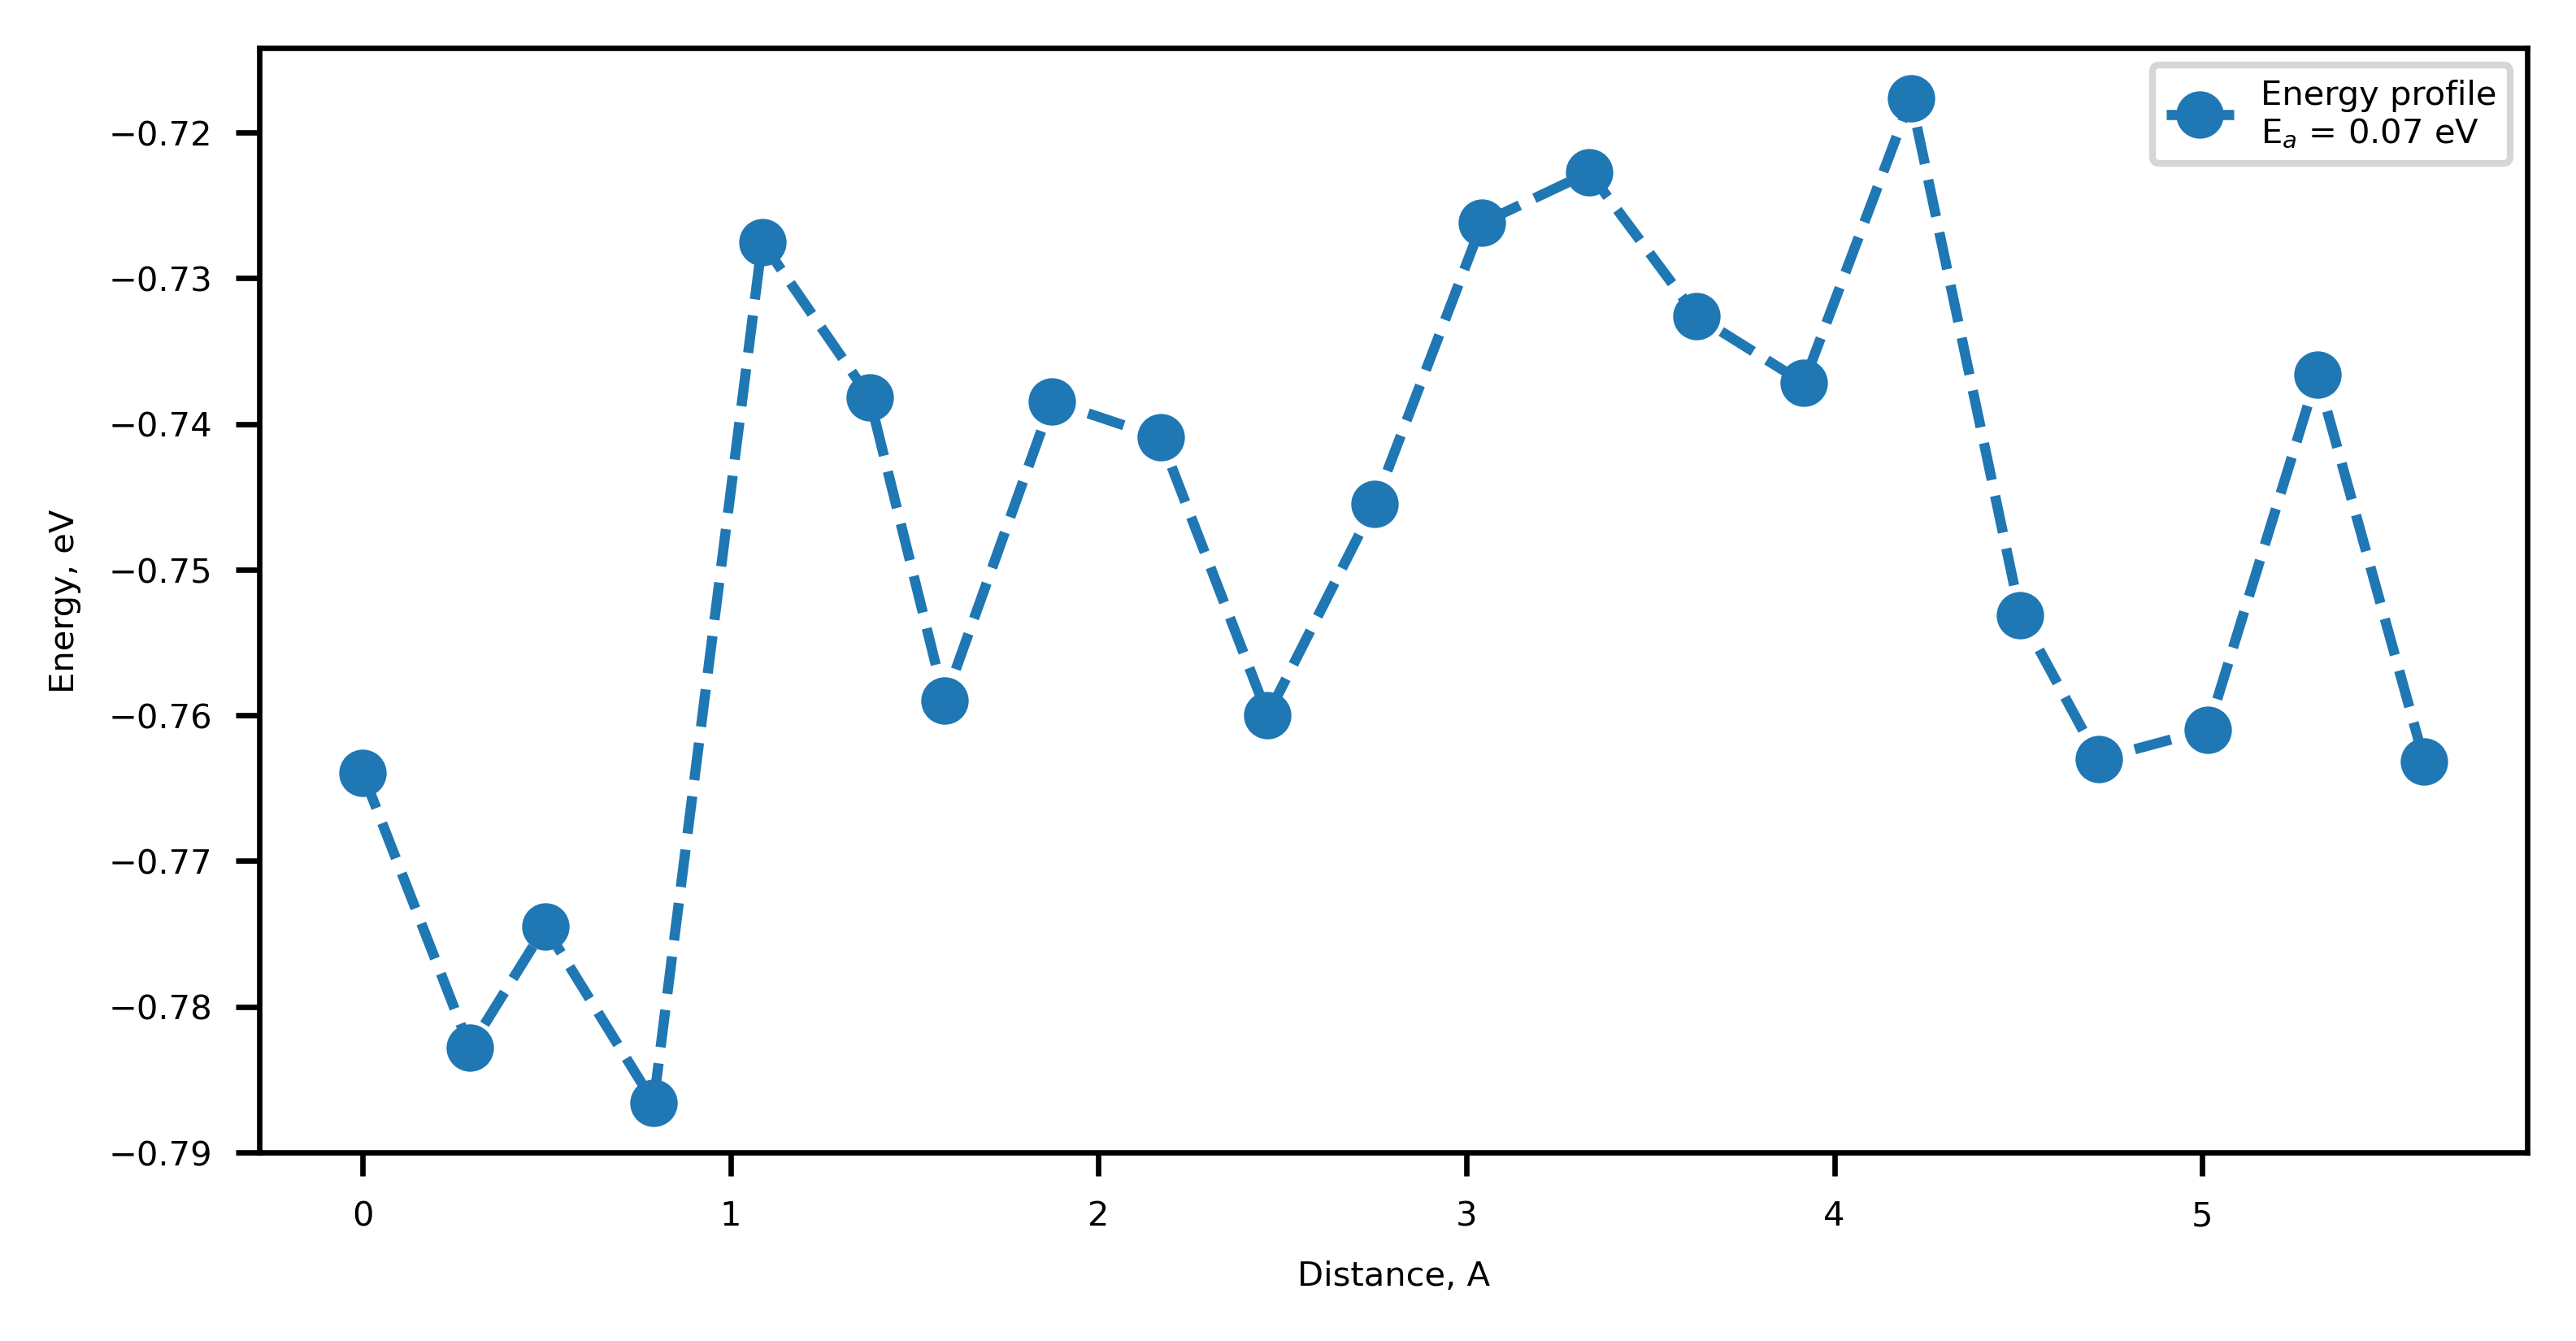

In [99]:
source = [0.22654,   0.77838,   0.64429] # fractional coordinates
target = [0.29416,   0.54786,   0.39660]

path_params = {
    'encut': 5.0,
    'pbc': False,
    'max_jump_dist': 12.0
}

energy, coords, dist = calc.energy_profile_loop(source, target, **path_params)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})

fig, ax = plt.subplots(dpi = 600, figsize = (6,3))


ax.set_ylabel('Energy, eV')
ax.set_xlabel('Distance, A')
activation_energy = round((energy - energy.min()).max(),2)
ax.plot(dist, energy, '--o',
        label = f'Energy profile\nE$_a$ = {activation_energy} eV')
ax.legend()

As you could see the profile looks awkward. There are at least two reason:
* 0.2 resolution is a bit rough
* the algorihm of pathway search does not look for a saddle point intentionaly. It looks for a shortest pathway having minimum energy threshold. 

It means we should believe this activation energy, but the profile is not, strictly speaking, optimized trajectory of the ion migration. However, it is very close to the one. So we can use it as the initial guess migration pathway for DFT-NEB calculations in VASP (see below).


### Input trajectory for DFT-NEB in VASP

In [103]:
source = [0.22654,   0.77838,   0.64429] # fractional coordinates
target = [0.29416,   0.54786,   0.39660]

calc_params = {
    'images': 5,
    'encut': 5.0,
    'pbc': False,
    'max_jump_dist': 12.0,
    'path': '/Users/artemdembitskiy/Downloads/'
}

coords = calc.NEB(source, target, **path_params)



Files were written to 

